# Visualização de dados

A visualização de dados é muito importante na análise exploratória de dados (Exploratory Data Analysis - EDA). Com visualizações podemos aprender sobre nossos dados de forma mais intuitiva e podemos identificar padrões que podem ser estudados quantitativamente posteriormente.

Vamos estudar duas bibliotecas a princípio, mas todas elas funcionam de forma muito semelhante e em geral basta ler a documentação ou utilizar a função help() para obter ajuda nas funções que usamos para gerar os dados.

Para o seaborn, usei esse estudo do Kaggle como inspiração: https://www.kaggle.com/code/balraj98/visualizing-the-space-race/notebook

In [12]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# Importe os dados do arquivo Space_Corrected.csv como um DataFrame
dados = pd.read_csv('Space_Corrected.csv')
dados.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


<AxesSubplot:xlabel='Ano'>

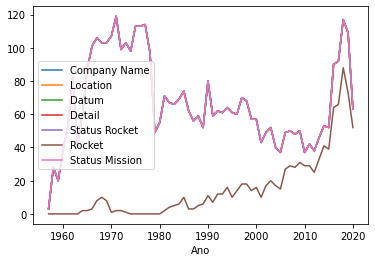

In [4]:
# A coluna Datum possui informações sobre a data de lançamento
# Para transformar a data de texto para datetime e poder obter o ano, vamos utilizar a função to_datetime
# Assim vamos obter o ano de cada lançamento e salvar em uma nova coluna
dados['Ano'] = [i.year for i in pd.to_datetime(dados['Datum'])]
# Obtenha quantos lançamentos foram realizados por ano e qual ano teve mais lançamentos
por_ano = dados.groupby('Ano').count().sort_values('Ano',ascending=False)

# O gráfico padrão da função plot() de um DataFrame é um gráfico de linhas.
por_ano.plot()

<AxesSubplot:xlabel='Ano'>

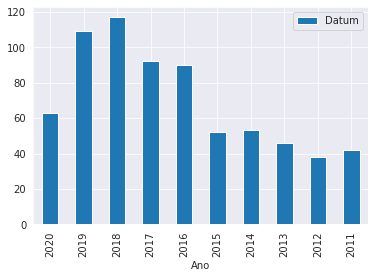

In [18]:
# Um gráfico de barras pode ser obtido utilizando a função bar() do módulo plot
por_ano[['Datum']][0:10].plot.bar()
#help(pd.DataFrame.plot.bar)

## Backends - Bibliotecas de Visualização

Ao longo de nossa jornada de programação, vamos nos deparar com diferentes bibliotecas para realizar a mesma tarefa, então podemos mudar de acordo com nossas preferências. É comum se referir à biblioteca por detrás de nossos gráficos como backend. 

Todos os gráficos que fizemos até aqui usando o módulo plot da biblioteca Pandas, ou seja, direto do DataFrame que contém os dados, utiliza a biblioteca Matplotlib como backend. Isso quer dizer que o Pandas usa a Matplotlib para produzir seus gráficos. 

Aqui vamos produzir o mesmo gráfico utilizando uma biblioteca chamada Seaborn. Entenda que é possível obter gráficos de alta qualidade com ambas as bibliotecas, ou backends.

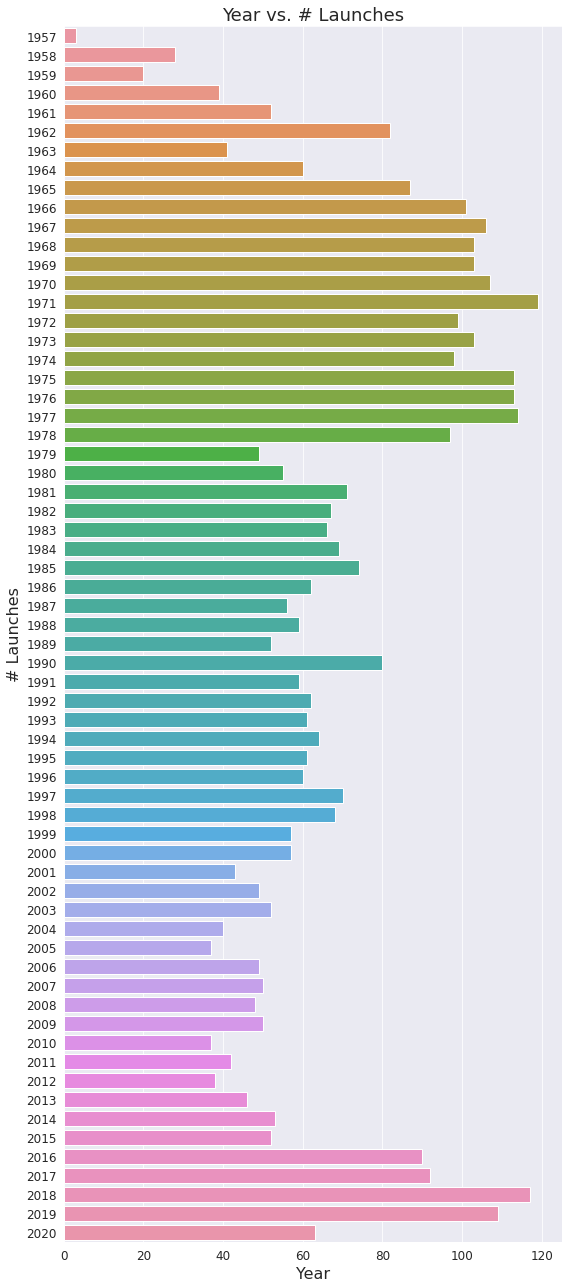

In [23]:
# Para produzir nosso gráfico, começamos com 
# uma figura Matplotlib que vamos preencher com 
# nosso gráfico Seaborn
plt.figure(figsize=(8,18)) # nova figura
ax = sns.countplot(y=dados['Ano']) # gráfico de barras
ax.axes.set_title("Year vs. # Launches",fontsize=18) # título
ax.set_xlabel("Year",fontsize=16) # rótulos dos eixos x e y
ax.set_ylabel("# Launches",fontsize=16)
ax.tick_params(labelsize=12) # tamanho da fonte dos rótulos
plt.tight_layout() 
plt.show() # mostra o gráfico gerado



<AxesSubplot:ylabel='Frequency'>

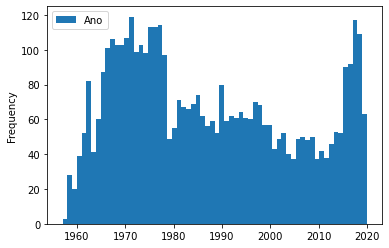

In [6]:
# O histograma permite visualizar o número de vezes que um valor se repete
# também chamado frequência daquele valor.
dados.plot.hist(bins=64)
#help(pd.DataFrame.plot.bar)

<AxesSubplot:xlabel='Ano', ylabel='Count'>

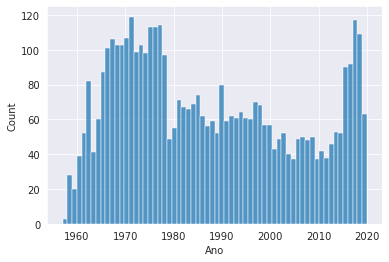

In [26]:
sns.histplot(data=dados,x = 'Ano',bins=64)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Ano
Status Mission,,,,,,,
Failure,339,339,339,339,339,36,339
Partial Failure,102,102,102,102,102,17,102
Prelaunch Failure,4,4,4,4,4,1,4
Success,3879,3879,3879,3879,3879,910,3879


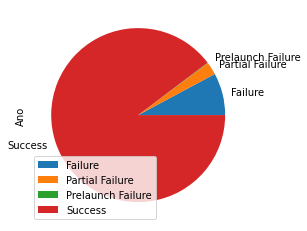

In [7]:

# Determine quantos lançamentos foram bem sucedidos
por_status = dados.groupby('Status Mission').count()

# O gráfico de pizza chama-se pie() no Matplotlib :9
por_status.plot.pie(y='Ano')
por_status

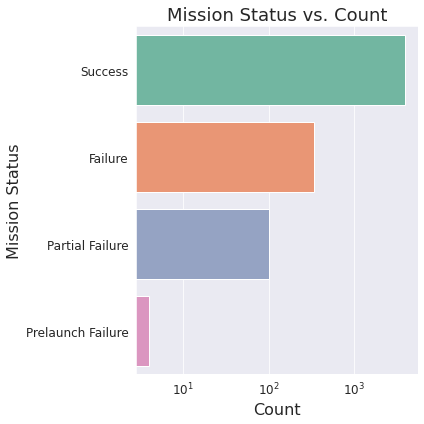

In [20]:
# Vamos agora obter como gráfico de barras

plt.figure(figsize=(6,6))
ax = sns.countplot(y="Status Mission", data=dados, order=dados["Status Mission"].value_counts().index, palette="Set2")
ax.set_xscale("log")
ax.axes.set_title("Mission Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Mission Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



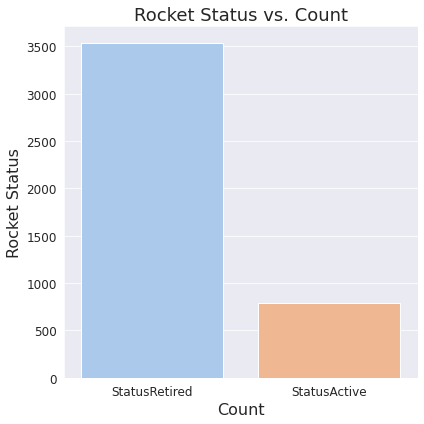

In [19]:


plt.figure(figsize=(6,6))
ax = sns.countplot(x="Status Rocket", data=dados, order=dados["Status Rocket"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()



,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Ano
Status Mission,,,,,,,
Failure,121,121,121,121,121,0,121
Partial Failure,41,41,41,41,41,0,41
Prelaunch Failure,1,1,1,1,1,0,1
Success,1614,1614,1614,1614,1614,2,1614


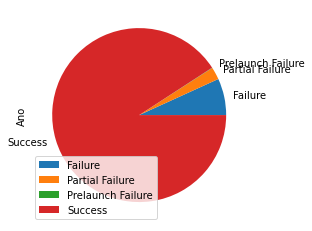

In [8]:
ussr_status = dados[dados['Company Name'] == 'RVSN USSR'].groupby('Status Mission').count()
ussr_status.plot.pie(y='Ano')
ussr_status

<AxesSubplot:ylabel='Ano'>

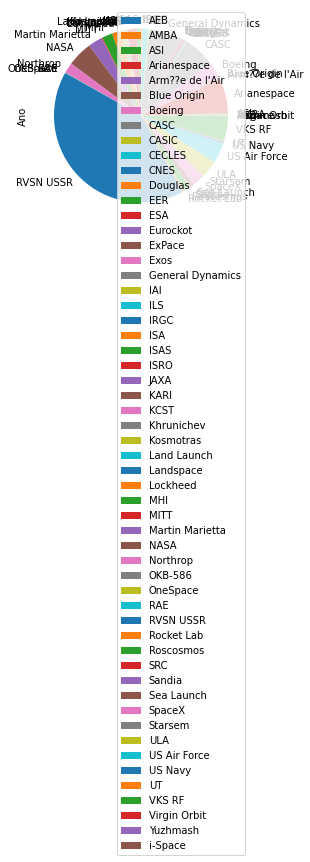

In [9]:

# Determine quantos lançamentos foram realizados por cada Company Name
# Quantos lançamentos são brasileiros (Agência Espacial Brasileira - AEB)?
por_compania = dados.groupby('Company Name').count()

por_compania.plot.pie(y='Ano')

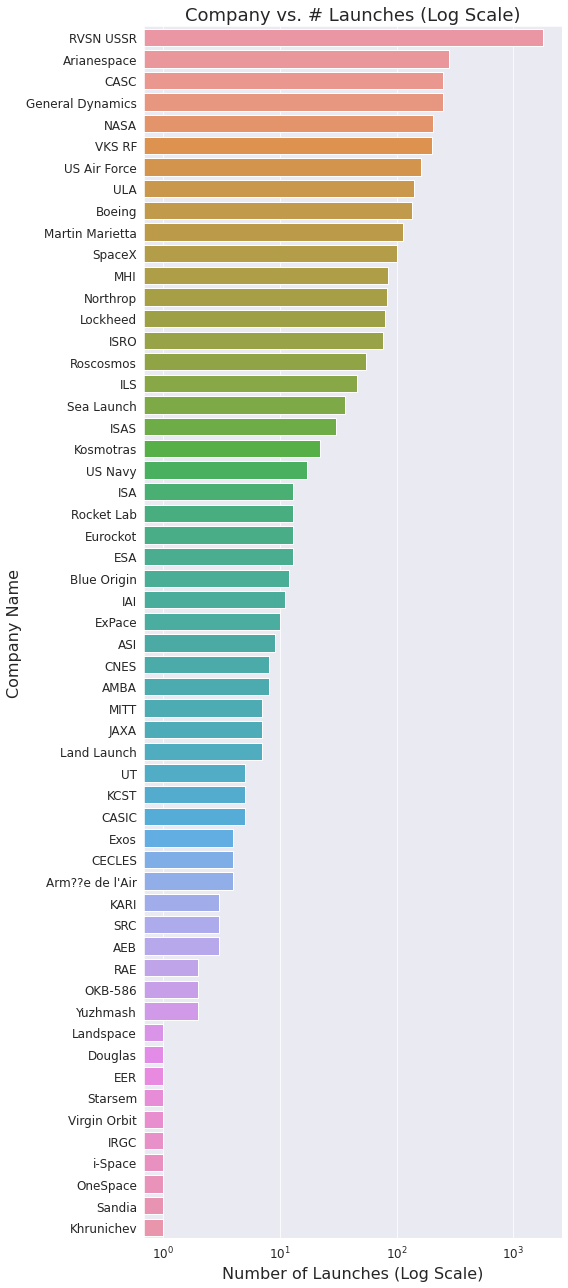

In [15]:
plt.figure(figsize=(8,18))
ax = sns.countplot(y="Company Name", data=dados, order=dados["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Company vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company Name",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

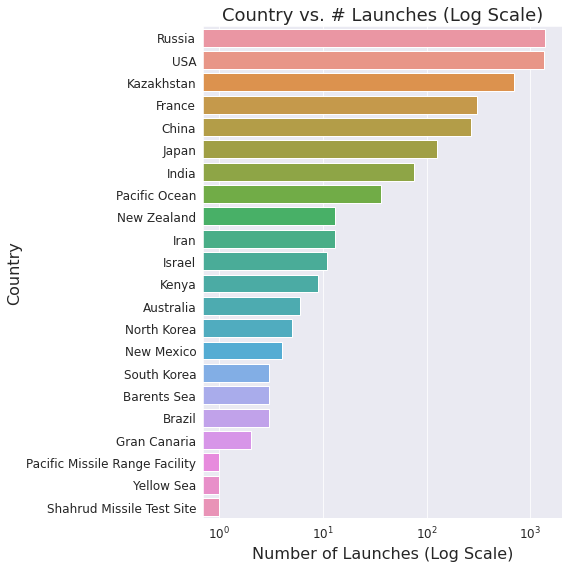

In [17]:
dados["Country"] = dados["Location"].apply(lambda location: location.split(", ")[-1])
dados.head()


plt.figure(figsize=(8,8))
ax = sns.countplot(y="Country", data=dados, order=dados["Country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Launches (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

